### Bryson Denham Benchmark

$\min J = \frac{1}{2} \; \int_0^1 u^2(t) dt$

$\mathrm{subject\;to}$

$\frac{dx(t)}{dt} = v(t) $

$\frac{dv(t)}{dt} = u(t) $

$x(0) \; = \; x(1) \; = \; 0$

$v(0) \; = \; -v(1) \; = \; 1$

$x(t) \le \ell, \; \ell=\frac{1}{9}$

### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

### Time

In [2]:
m = GEKKO(remote=False)
nt = 101; m.time = np.linspace(0,1,nt)

### Variables

$x(0) \; = \; 0$

$v(0) \;= \; 1$

$x(t) \le \ell, \; \ell=\frac{1}{9}$

In [3]:
x = m.Var(value=0,ub=1/9)
v = m.Var(value=1)
u = m.Var(value=-6)

### Equations

$\frac{dx(t)}{dt} = v(t) $

$\frac{dv(t)}{dt} = u(t) $

In [4]:
m.Equation(x.dt()==v)
m.Equation(v.dt()==u)

### Final Conditions

$x(1) \; = \; 0$

$v(1) \; = \; -1$

In [7]:
# Final conditions
p = np.zeros(nt); p[-1] = 1.0
final = m.Param(value=p)

soft = True
if soft:
    # soft terminal constraint
    m.Minimize(final*1e5*x**2)
    m.Minimize(final*1e5*(v+1)**2)
else:
    # hard terminal constraint
    xf = m.Param();    vf = m.Param()
    m.free(xf);        m.free(vf)
    m.fix_final(xf,0); m.fix_final(vf,-1)
    # connect endpoint parameters to x and v
    m.Equations([xf==x,vf==v])

### Objective Function

$\min J = \frac{1}{2} \; \int_0^1 u^2(t) dt$

In [8]:
obj = m.Intermediate(0.5*m.integral(u**2))
m.Minimize(final*obj)

### Solve

In [9]:
m.options.IMODE = 6
m.options.NODES = 2
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  6
   Intermediates:  2
   Connections  :  0
   Equations    :  9
   Residuals    :  7
 
 Number of state variables:    900
 Number of total equations: -  800
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         

### Create a figure

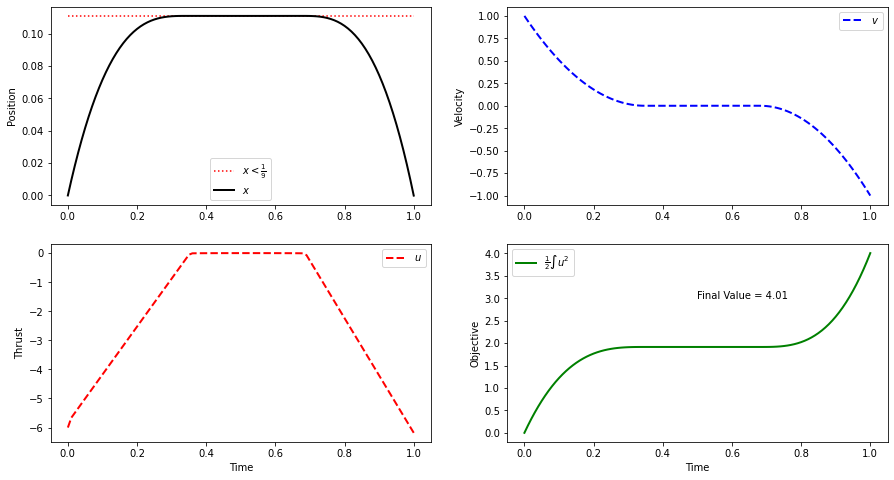

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot([0,1],[1/9,1/9],'r:',label=r'$x<\frac{1}{9}$')
plt.plot(m.time,x.value,'k-',lw=2,label=r'$x$')
plt.ylabel('Position')
plt.legend(loc='best')
plt.subplot(2,2,2)
plt.plot(m.time,v.value,'b--',lw=2,label=r'$v$')
plt.ylabel('Velocity')
plt.legend(loc='best')
plt.subplot(2,2,3)
plt.plot(m.time,u.value,'r--',lw=2,label=r'$u$')
plt.ylabel('Thrust')
plt.legend(loc='best')
plt.xlabel('Time')
plt.subplot(2,2,4)
plt.plot(m.time,obj.value,'g-',lw=2,label=r'$\frac{1}{2} \int u^2$')
plt.text(0.5,3.0,'Final Value = '+str(np.round(obj.value[-1],2)))
plt.ylabel('Objective')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()